# K Nearest Neighbours Use Case for Anonymised Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('KNN_Project_Data')

# Exploring the Data

In [6]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


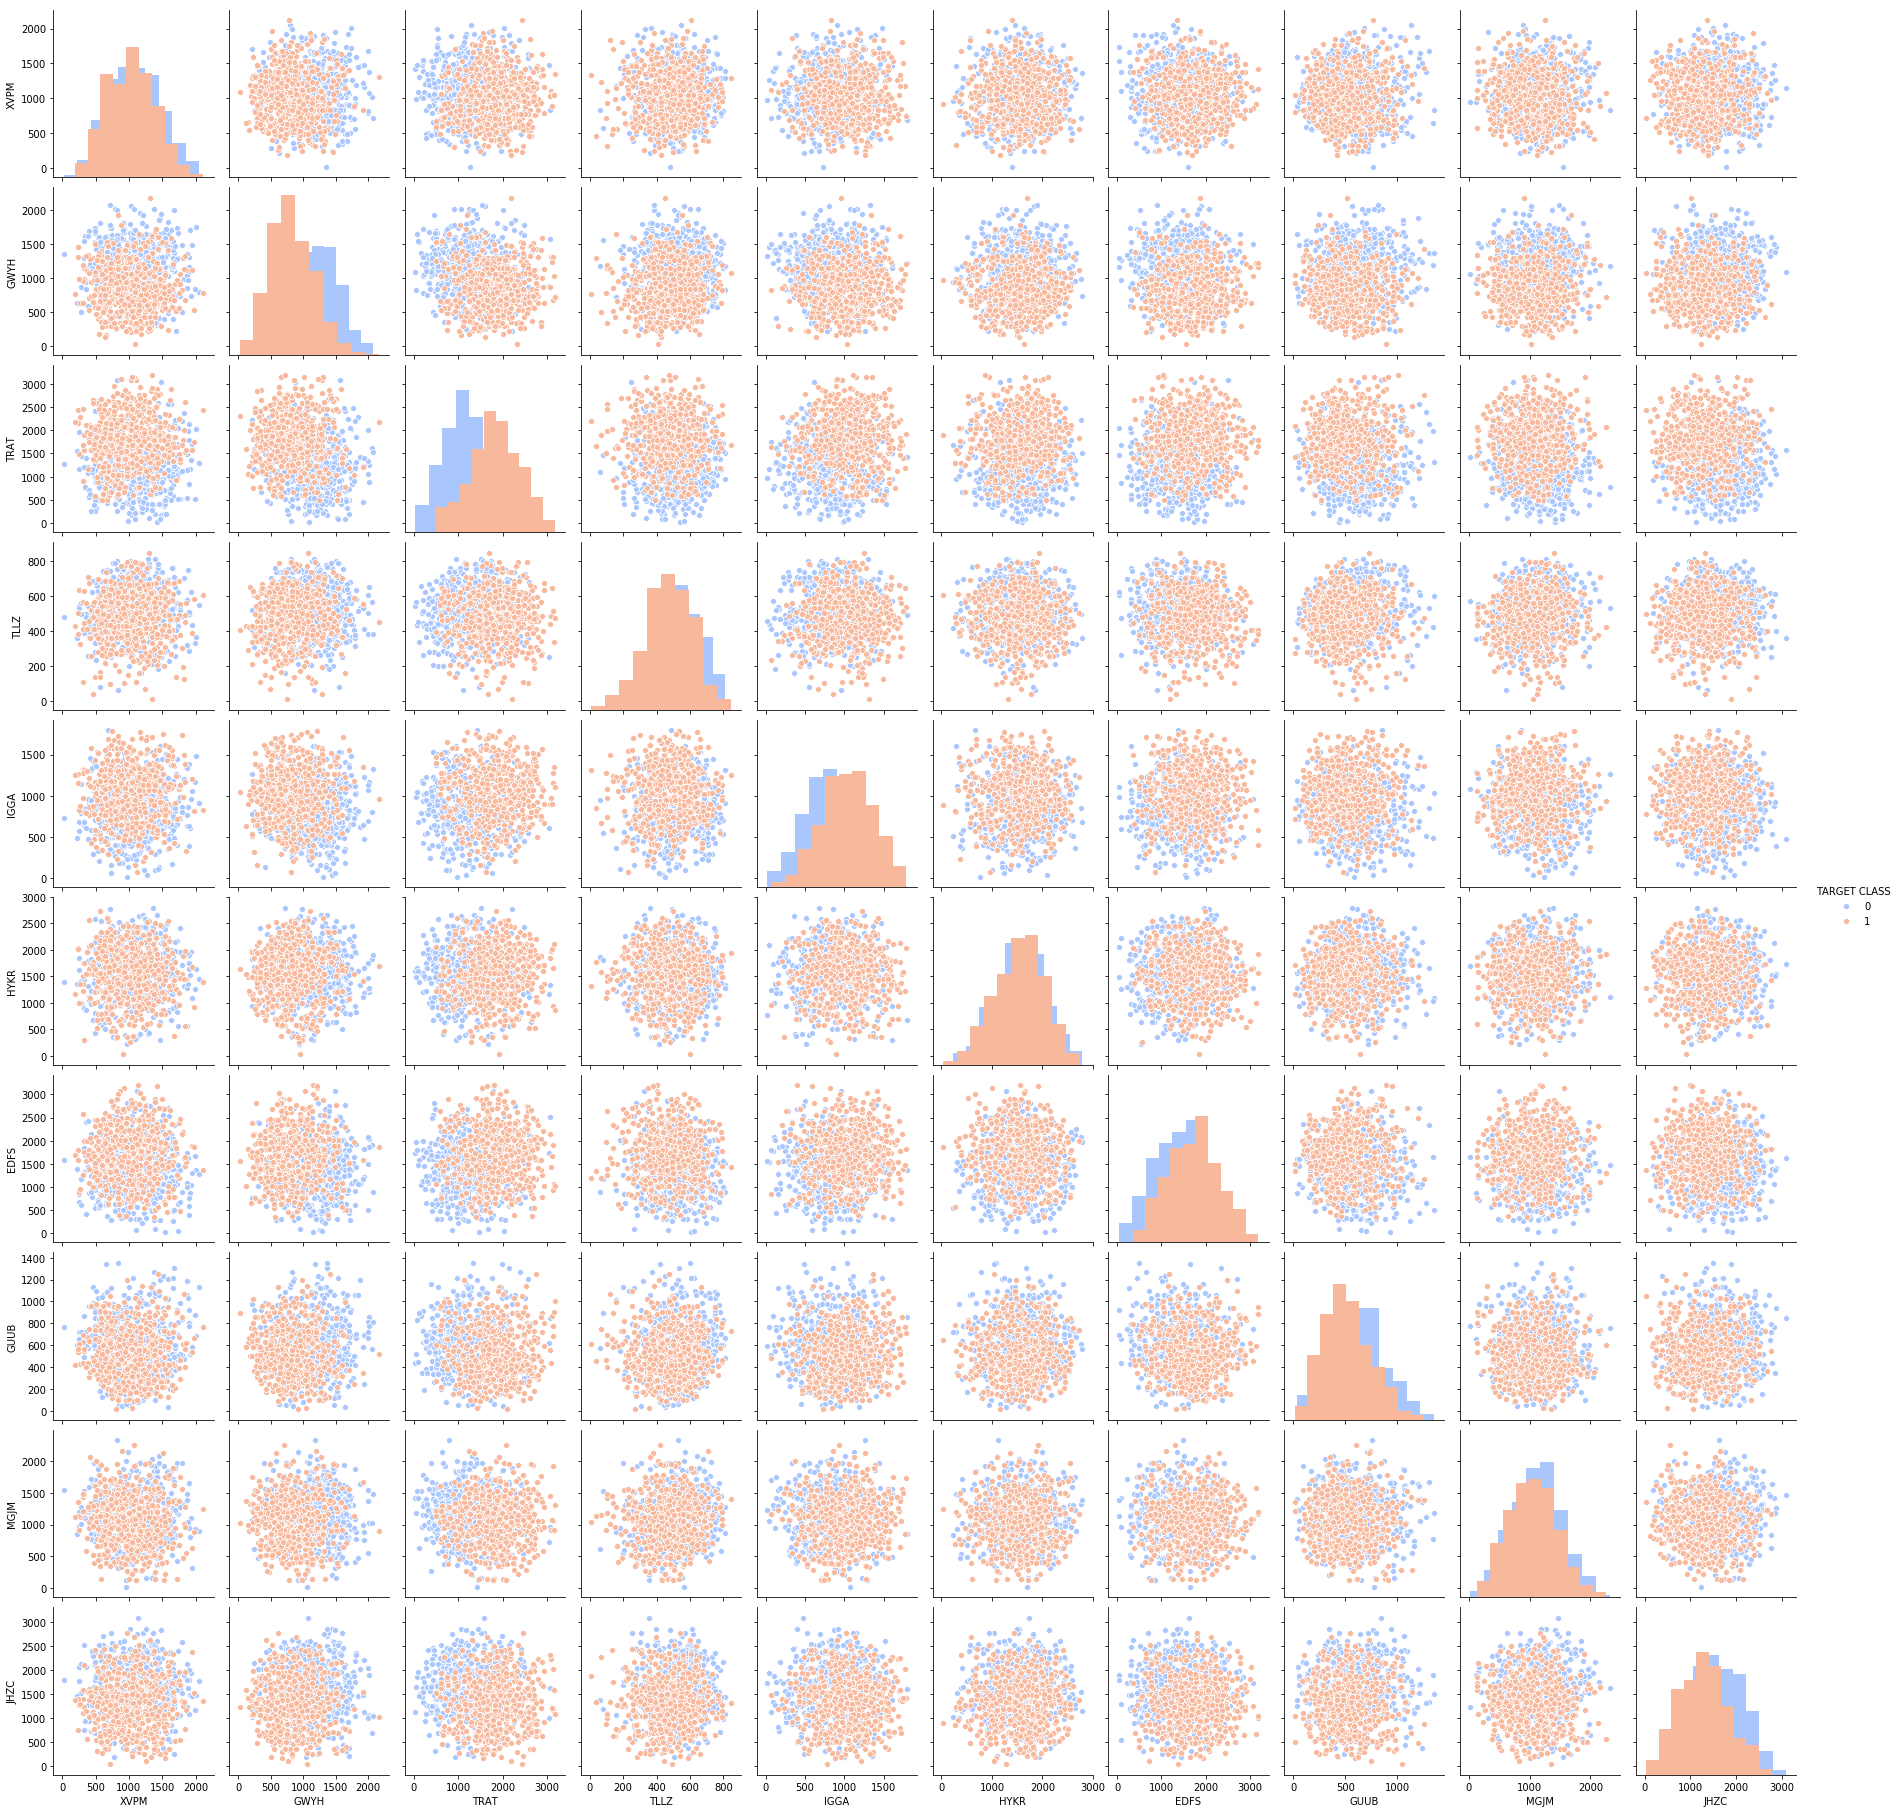

In [8]:
#pairplot with the hue indicated by the TARGET CLASS column

sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm',diag_kind='hist')

# Standardize the Variables

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
#Create a StandardScaler() object called scaler

scaler = StandardScaler()

In [12]:
#Fit scaler to the features

scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
#Use the .transform() method 
##to transform the features to a scaled version of the features.

scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [15]:
#Convert the scaled features to a dataframe

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

#Check the head of this dataframe to make sure the scaling worked

df_feat.head(3)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811


# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df_feat
y = df['TARGET CLASS']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30, random_state=101)

# Using K Neighbors Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
#Create a KNN model instance with n_neighbors=1

knn = KNeighborsClassifier(n_neighbors=1)

In [27]:
#Fit this KNN model to the training data.

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations

In [28]:
#Use the predict method to predict values using your KNN model and X_test.

pred = knn.predict(X_test)

In [29]:
#Create a confusion matrix and classification report

from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(confusion_matrix(y_test,pred))

[[109  43]
 [ 41 107]]


In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

   micro avg       0.72      0.72      0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value use the Elbow Method

In [32]:
#elbow method to pick a good K Value

#or loop that trains various KNN models with different k values, 
##then keep track of the error_rate for each of these models with a list


error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

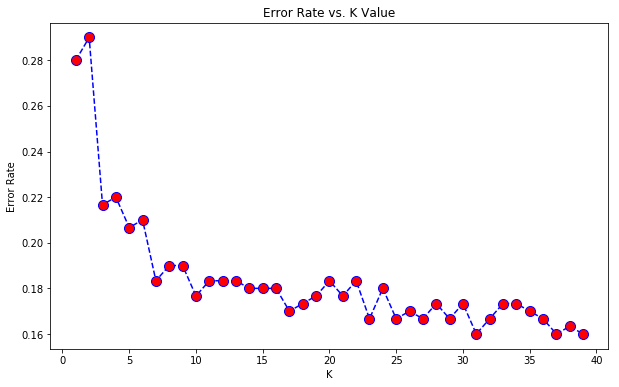

In [33]:
#plotting the values from your for loop

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#Increase the K value to explore the drop in the error rate further  

In [34]:
#Increase the K value (to 60) to explore the drop in the error rate further

error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

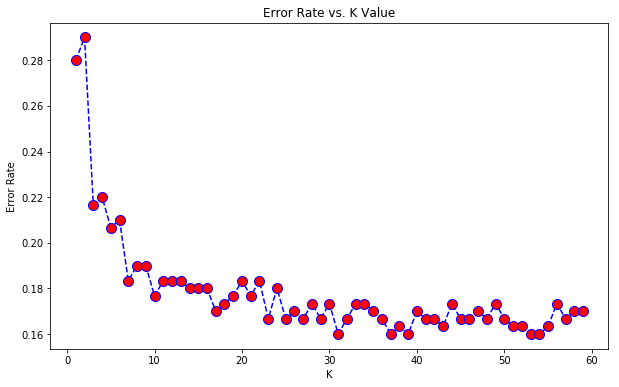

In [35]:
#plotting the values from your for loop upto k=60

plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

In [36]:
#Retrain the model with the best K=30


knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[124  28]
 [ 24 124]]


              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

   micro avg       0.83      0.83      0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



**Note: the increase in Accuracy, Precision and Recall at the higher K value of 30!**

**Increase of around 11%**